In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import warnings
from openpyxl import load_workbook


In [2]:
df =  pd.read_excel('obs_tabl20c_do_20240101.xlsx', sheet_name = 'Активы - всего', skiprows = 1)
df.to_csv("Test.csv")
df = df.transpose()
column_names = df.columns.tolist()
for i in range(len(column_names)):
    if pd.isna(df.iloc[1][i]):
        column_names[i] = df.iloc[0][i]
    else:
        column_names[i] = df.iloc[1][i]
df.columns = column_names
df = df.reset_index()
df = df.drop(0, axis = 0)
df = df.drop(1, axis = 0)
df = df.reset_index()
df = df.drop('level_0', axis = 1)
df.rename(columns = {'index': 'Отчетный период'}, inplace = True)
df = df.dropna(axis=1, how='all')
df

,Отчетный период,Денежные средства и их эквиваленты,"Денежные средства (касса, чеки, денежные средства в пути, в банкоматах)",Драгоценные металлы и камни,Корреспондентские счета в кредитных организациях,Средства в Банке России,Корреспондентские счета в Банке России,Резервы на возможные потери (без учета МСФО 9),Корректировка резерва на возможные потери по МСФО 9,Депозиты в Банке России,...,Отложенный налоговый актив,Прочие активы,Средства в расчетах,Дебиторы,Требования по начисленным процентам (без учета начисленных процентов (купонов) по ценным бумагам),Прочее,Резервы на возможные потери (без учета МСФО 9),Корректировка резерва на возможные потери по МСФО 9,Итого активов,Справочно: активы-брутто (до вычета резервов на возможные потери и налога на прибыль).
0,2008-02-01 00:00:00,1336.024018,374.632543,14.83546,392.530965,554.205351,538.372379,-0.180301,-,286.3702,...,-,384.894796,139.10372,92.203317,80.394306,132.276637,-59.083184,-,19405.814204,20144.534259
1,2008-03-01 00:00:00,1341.263091,381.067785,13.975895,352.295738,594.109164,583.111521,-0.185491,-,127.117448,...,-,403.25341,146.608627,96.192381,89.108516,133.532807,-62.188921,-,19959.59635,20723.742454
2,2008-04-01 00:00:00,1348.168248,402.577193,10.29656,333.729771,601.757269,591.068653,-0.192545,-,122.72859,...,-,451.497618,188.49209,99.051821,85.190382,142.360191,-63.596866,-,20538.540212,21322.359284
3,2008-05-01 00:00:00,1360.93522,409.351013,10.093415,330.327627,611.322526,602.174225,-0.159361,-,70.769088,...,-,466.489511,184.752995,102.388792,94.510339,152.074675,-67.23729,-,20912.302254,21724.207966
4,2008-06-01 00:00:00,1327.585389,405.108074,11.303387,362.496144,548.843654,538.443132,-0.16587,-,235.66993,...,-,499.230992,203.483601,104.864381,111.777061,153.15639,-74.050441,-,21592.147707,22431.720207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-09-01 00:00:00,12911.917432,2134.558038,407.295207,6056.055034,4533.223497,4523.148034,-61.486659,-157.727685,2606.535484,...,829.28754,4199.457722,1680.184222,884.862032,2340.241431,1440.227603,-2624.937573,478.880007,157338.324654,168028.748711
188,2023-10-01 00:00:00,11877.959651,2129.513733,472.441613,6250.256033,3238.890621,3232.35934,-62.909911,-150.232438,2889.491036,...,832.075034,4240.650027,1660.985372,906.458512,2266.090685,1551.285694,-2628.543263,484.373027,158994.111476,169710.960318
189,2023-11-01 00:00:00,11339.016116,1995.223922,424.160424,6154.944541,2981.878333,2975.935516,-62.271388,-154.919716,3335.870393,...,871.438298,4325.98016,1577.084296,830.367176,2416.462984,1537.479842,-2492.15356,456.739422,161850.792323,172488.154454
190,2023-12-01 00:00:00,13120.986291,1890.354953,423.384835,6031.70846,4991.953462,4984.089723,-61.642429,-154.77299,1756.418792,...,871.821054,4665.372164,1522.075485,832.75354,2616.572471,1747.372028,-2474.581233,421.179873,163838.794651,174606.090762


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 61 columns):
 #   Column                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                       --------------  ----- 
 0   Отчетный период                                                                                              192 non-null    object
 1   Денежные средства и их эквиваленты                                                                           192 non-null    object
 2   Денежные средства (касса, чеки, денежные средства в пути, в банкоматах)                                      192 non-null    object
 3   Драгоценные металлы и камни                                                                                  192 non-null    object
 4   Корреспондентские счета в кредитных организациях                    

In [4]:
df.columns[10]

'Обязательные резервы в Банке России '

In [5]:
df = df[['Отчетный период', 'Денежные средства и их эквиваленты', 'Депозиты в Банке России', 'Обязательные резервы в Банке России ', 'Кредиты банкам', 'Ценные бумаги', 'Участие в уставных капиталах', 'Кредитный портфель и прочие размещенные средства', 'Производные финансовые инструменты, от которых ожидается получение экономических выгод', 'Основные средства и финансовая аренда', 'Недвижимость, временно неиспользуемая в основной деятельности', 'Нематериальные активы', 'Отложенный налоговый актив', 'Прочие активы', 'Итого активов', 'Справочно: активы-брутто (до вычета резервов на возможные потери и налога на прибыль).']]

In [6]:
df 

,Отчетный период,Денежные средства и их эквиваленты,Депозиты в Банке России,Обязательные резервы в Банке России,Кредиты банкам,Ценные бумаги,Участие в уставных капиталах,Кредитный портфель и прочие размещенные средства,"Производные финансовые инструменты, от которых ожидается получение экономических выгод",Основные средства и финансовая аренда,"Недвижимость, временно неиспользуемая в основной деятельности",Нематериальные активы,Отложенный налоговый актив,Прочие активы,Итого активов,Справочно: активы-брутто (до вычета резервов на возможные потери и налога на прибыль).
0,2008-02-01 00:00:00,1336.024018,286.3702,233.91666,1507.978218,2199.310779,168.539864,12854.574952,-,433.102506,-,1.102211,-,384.894796,19405.814204,20144.534259
1,2008-03-01 00:00:00,1341.263091,127.117448,316.470194,1790.587158,2232.663896,167.791778,13138.694678,-,440.637126,-,1.117571,-,403.25341,19959.59635,20723.742454
2,2008-04-01 00:00:00,1348.168248,122.72859,339.155178,1919.151947,2100.808507,169.083802,13634.605412,-,452.237022,-,1.103888,-,451.497618,20538.540212,21322.359284
3,2008-05-01 00:00:00,1360.93522,70.769088,345.642223,1818.415684,2105.691558,180.368825,14105.212439,-,457.679337,-,1.098369,-,466.489511,20912.302254,21724.207966
4,2008-06-01 00:00:00,1327.585389,235.66993,350.355249,1885.21835,2124.187039,195.156483,14512.908245,-,460.681505,-,1.154525,-,499.230992,21592.147707,22431.720207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-09-01 00:00:00,12911.917432,2606.535484,271.720541,15724.073463,20997.928645,3617.929641,93029.114411,812.834426,1402.028797,95.513064,839.983488,829.28754,4199.457722,157338.324654,168028.748711
188,2023-10-01 00:00:00,11877.959651,2889.491036,271.712218,15837.666669,20836.586535,3513.658021,95523.415219,821.327592,1406.225175,96.785859,846.55844,832.075034,4240.650027,158994.111476,169710.960318
189,2023-11-01 00:00:00,11339.016116,3335.870393,271.712218,17067.482744,20679.748464,3493.158743,97339.162012,724.469149,1417.488195,101.813432,883.452399,871.438298,4325.98016,161850.792323,172488.154454
190,2023-12-01 00:00:00,13120.986291,1756.418792,271.706379,16830.988849,20863.603115,3642.316692,98750.386603,649.14566,1429.811172,93.393691,892.844189,871.821054,4665.372164,163838.794651,174606.090762


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 16 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Отчетный период                                                                         192 non-null    object
 1   Денежные средства и их эквиваленты                                                      192 non-null    object
 2   Депозиты в Банке России                                                                 192 non-null    object
 3   Обязательные резервы в Банке России                                                     192 non-null    object
 4   Кредиты банкам                                                                          192 non-null    object
 5   Ценные бумаги                                                                 

In [8]:
cols_to_convert = df.columns.drop('Отчетный период')  
df.loc[:, cols_to_convert] = df.loc[:, cols_to_convert].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df

C:\Users\Дарья\AppData\Local\Temp\ipykernel_13188\3194001256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, cols_to_convert] = df.loc[:, cols_to_convert].apply(lambda x: pd.to_numeric(x, errors='coerce'))


,Отчетный период,Денежные средства и их эквиваленты,Депозиты в Банке России,Обязательные резервы в Банке России,Кредиты банкам,Ценные бумаги,Участие в уставных капиталах,Кредитный портфель и прочие размещенные средства,"Производные финансовые инструменты, от которых ожидается получение экономических выгод",Основные средства и финансовая аренда,"Недвижимость, временно неиспользуемая в основной деятельности",Нематериальные активы,Отложенный налоговый актив,Прочие активы,Итого активов,Справочно: активы-брутто (до вычета резервов на возможные потери и налога на прибыль).
0,2008-02-01 00:00:00,1336.024018,286.3702,233.91666,1507.978218,2199.310779,168.539864,12854.574952,NaN,433.102506,NaN,1.102211,NaN,384.894796,19405.814204,20144.534259
1,2008-03-01 00:00:00,1341.263091,127.117448,316.470194,1790.587158,2232.663896,167.791778,13138.694678,NaN,440.637126,NaN,1.117571,NaN,403.25341,19959.59635,20723.742454
2,2008-04-01 00:00:00,1348.168248,122.72859,339.155178,1919.151947,2100.808507,169.083802,13634.605412,NaN,452.237022,NaN,1.103888,NaN,451.497618,20538.540212,21322.359284
3,2008-05-01 00:00:00,1360.93522,70.769088,345.642223,1818.415684,2105.691558,180.368825,14105.212439,NaN,457.679337,NaN,1.098369,NaN,466.489511,20912.302254,21724.207966
4,2008-06-01 00:00:00,1327.585389,235.66993,350.355249,1885.21835,2124.187039,195.156483,14512.908245,NaN,460.681505,NaN,1.154525,NaN,499.230992,21592.147707,22431.720207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-09-01 00:00:00,12911.917432,2606.535484,271.720541,15724.073463,20997.928645,3617.929641,93029.114411,812.834426,1402.028797,95.513064,839.983488,829.28754,4199.457722,157338.324654,168028.748711
188,2023-10-01 00:00:00,11877.959651,2889.491036,271.712218,15837.666669,20836.586535,3513.658021,95523.415219,821.327592,1406.225175,96.785859,846.55844,832.075034,4240.650027,158994.111476,169710.960318
189,2023-11-01 00:00:00,11339.016116,3335.870393,271.712218,17067.482744,20679.748464,3493.158743,97339.162012,724.469149,1417.488195,101.813432,883.452399,871.438298,4325.98016,161850.792323,172488.154454
190,2023-12-01 00:00:00,13120.986291,1756.418792,271.706379,16830.988849,20863.603115,3642.316692,98750.386603,649.14566,1429.811172,93.393691,892.844189,871.821054,4665.372164,163838.794651,174606.090762


In [9]:
from datetime import datetime, date 

C:\Users\Дарья\AppData\Local\Temp\ipykernel_13188\3805642060.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df['Отчетный период'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
C:\Users\Дарья\AppData\Local\Temp\ipykernel_13188\3805642060.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.lineplot(x=df['Отчетный период'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
C:\Users\Дарья\AppData\Local\Temp\ipykernel_13188\3805642060.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df['Отчетный период'], y=df[column].fi

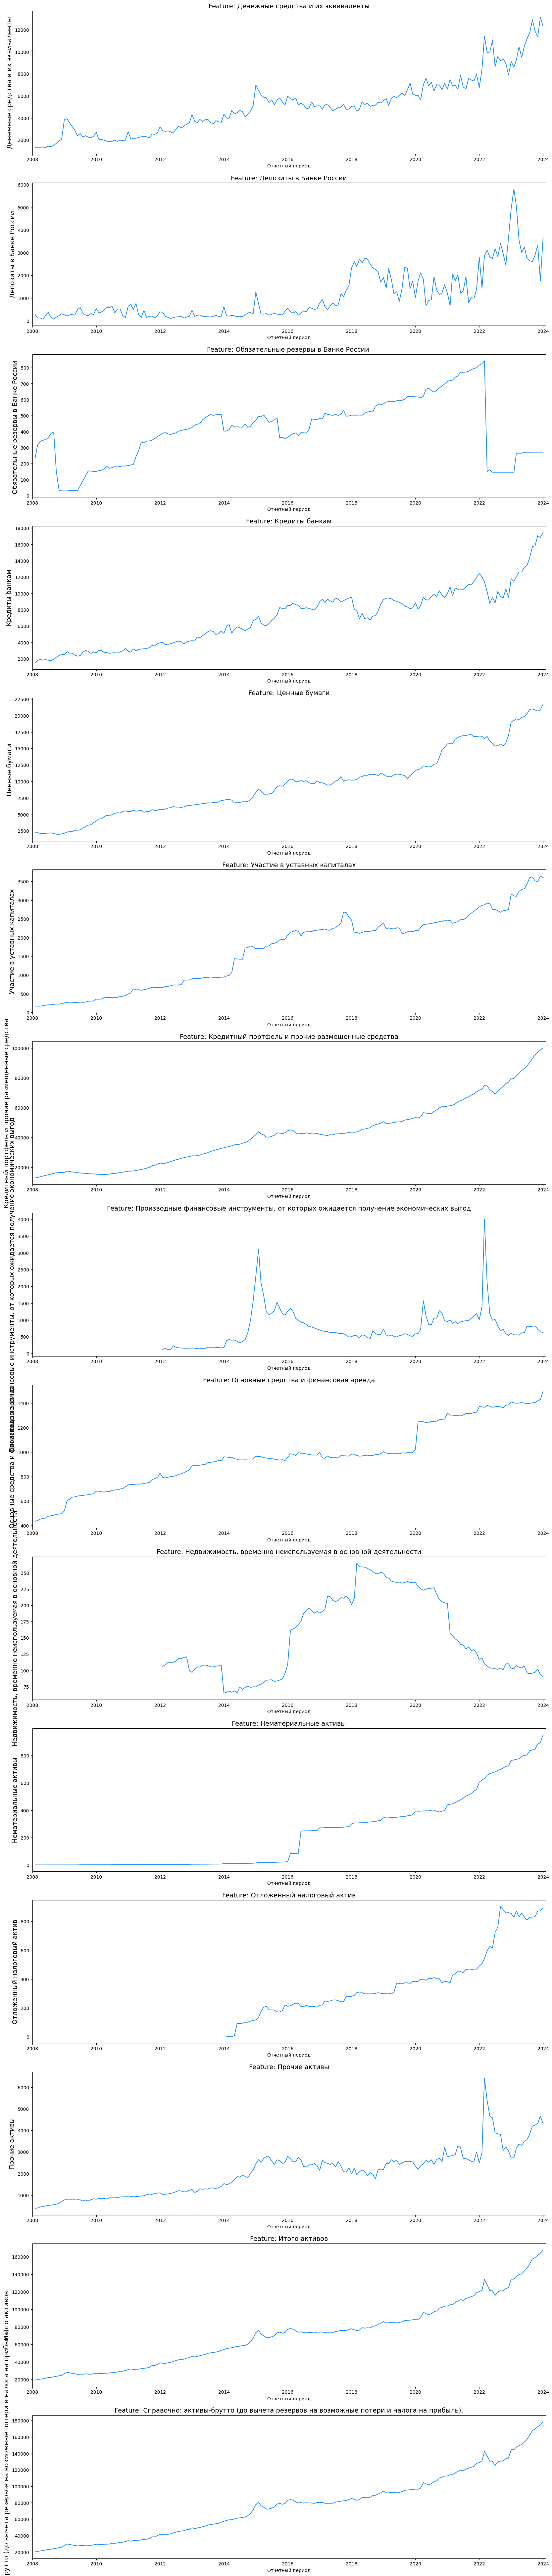

In [10]:
f, ax = plt.subplots(nrows=len(df.drop('Отчетный период', axis=1).columns), ncols=1, figsize=(20, 100))

for i, column in enumerate(df.drop('Отчетный период', axis=1).columns):
    sns.lineplot(x=df['Отчетный период'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2008, 1, 1), date(2024, 1, 30)]) 

In [11]:
df.isna().sum() # проверка, есть ли нулевые значения
# нулевые значения есть в трех категориях 
# необходимо почистить это, заменив на NaN и заполнив после этого 

Отчетный период                                                                            0
Денежные средства и их эквиваленты                                                         0
Депозиты в Банке России                                                                    0
Обязательные резервы в Банке России                                                        0
Кредиты банкам                                                                             0
Ценные бумаги                                                                              0
Участие в уставных капиталах                                                               0
Кредитный портфель и прочие размещенные средства                                           0
Производные финансовые инструменты, от которых ожидается получение экономических выгод    48
Основные средства и финансовая аренда                                                      0
Недвижимость, временно неиспользуемая в основной деятельности         

C:\Users\Дарья\AppData\Local\Temp\ipykernel_13188\1081920558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Производные финансовые инструменты, от которых ожидается получение экономических выгод'] = df['Производные финансовые инструменты, от которых ожидается получение экономических выгод'].replace(0, np.nan)
C:\Users\Дарья\AppData\Local\Temp\ipykernel_13188\1081920558.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.lineplot(x=df['Отчетный период'], y=df['Производные финансовые инструменты, от которых ожидается по

(13879.0, 19752.0)

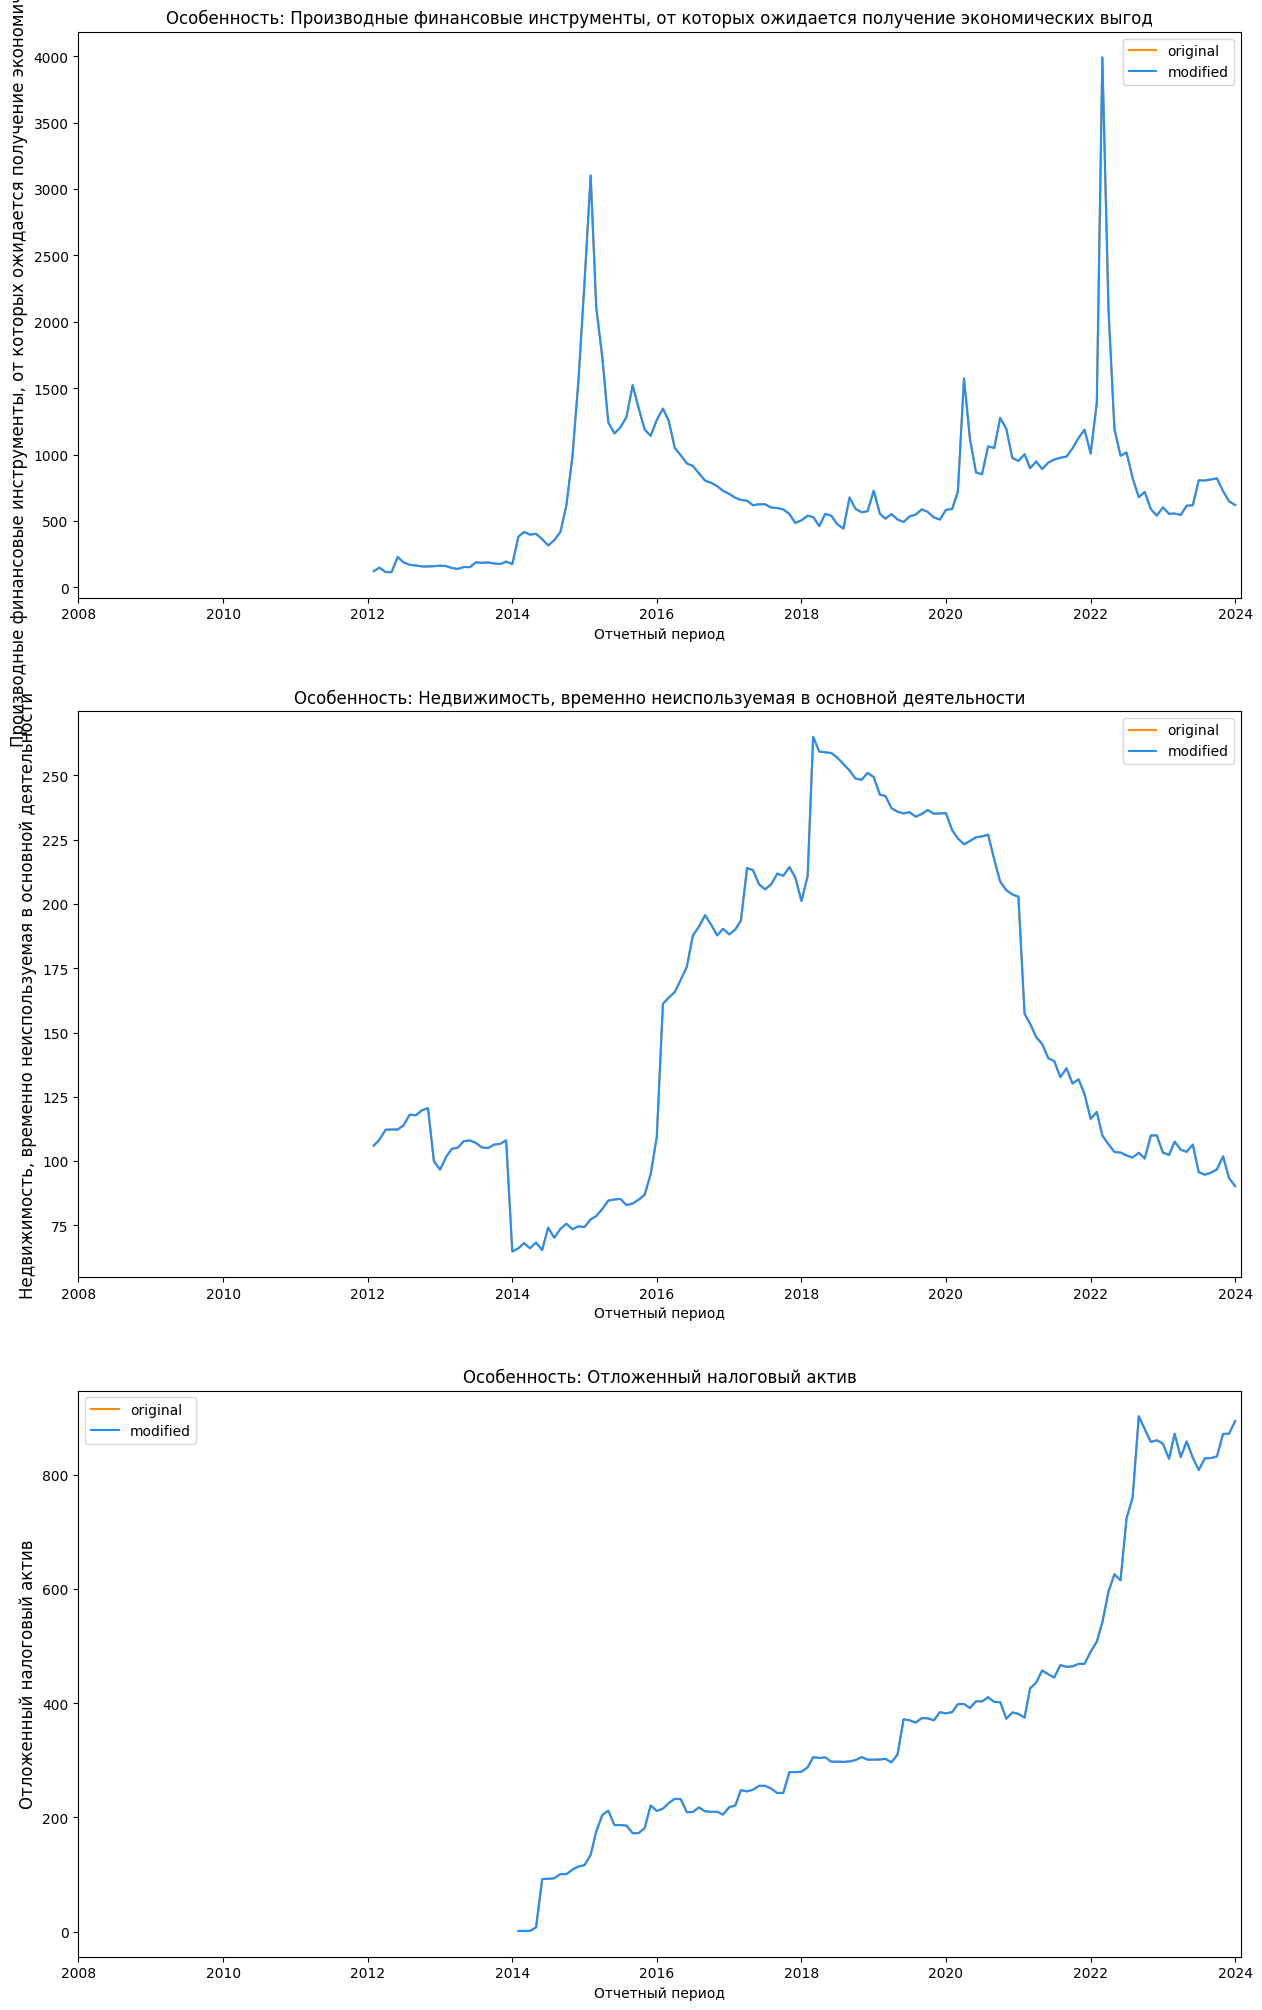

In [12]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 25))

old_instruments = df['Производные финансовые инструменты, от которых ожидается получение экономических выгод'].copy()
df['Производные финансовые инструменты, от которых ожидается получение экономических выгод'] = df['Производные финансовые инструменты, от которых ожидается получение экономических выгод'].replace(0, np.nan)

sns.lineplot(x=df['Отчетный период'], y=old_instruments, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['Отчетный период'], y=df['Производные финансовые инструменты, от которых ожидается получение экономических выгод'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Особенность: Производные финансовые инструменты, от которых ожидается получение экономических выгод', fontsize=12)
ax[0].set_ylabel(ylabel='Производные финансовые инструменты, от которых ожидается получение экономических выгод', fontsize=12)
ax[0].set_xlim([date(2008, 1, 1), date(2024, 1, 30)])

old_property = df['Недвижимость, временно неиспользуемая в основной деятельности'].copy()
df['Недвижимость, временно неиспользуемая в основной деятельности'] = df['Недвижимость, временно неиспользуемая в основной деятельности'].replace(0, np.nan)

sns.lineplot(x=df['Отчетный период'], y=old_property, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['Отчетный период'], y=df['Недвижимость, временно неиспользуемая в основной деятельности'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Особенность: Недвижимость, временно неиспользуемая в основной деятельности', fontsize=12)
ax[1].set_ylabel(ylabel='Недвижимость, временно неиспользуемая в основной деятельности', fontsize=12)
ax[1].set_xlim([date(2008, 1, 1), date(2024, 1, 30)])

old_tax = df['Отложенный налоговый актив'].copy()
df['Отложенный налоговый актив'] = df['Отложенный налоговый актив'].replace(0, np.nan)

sns.lineplot(x=df['Отчетный период'], y=old_tax, ax=ax[2], color='darkorange', label='original')
sns.lineplot(x=df['Отчетный период'], y=df['Отложенный налоговый актив'].fillna(np.inf), ax=ax[2], color='dodgerblue', label='modified')
ax[2].set_title('Особенность: Отложенный налоговый актив', fontsize=12)
ax[2].set_ylabel(ylabel='Отложенный налоговый актив', fontsize=12)
ax[2].set_xlim([date(2008, 1, 1), date(2024, 1, 30)])

# оранжевые линия не появились, так как NaN не разрывают наши непрерывные данные, их просто не хватает в самом начале

AttributeError: 'YTick' object has no attribute 'label'

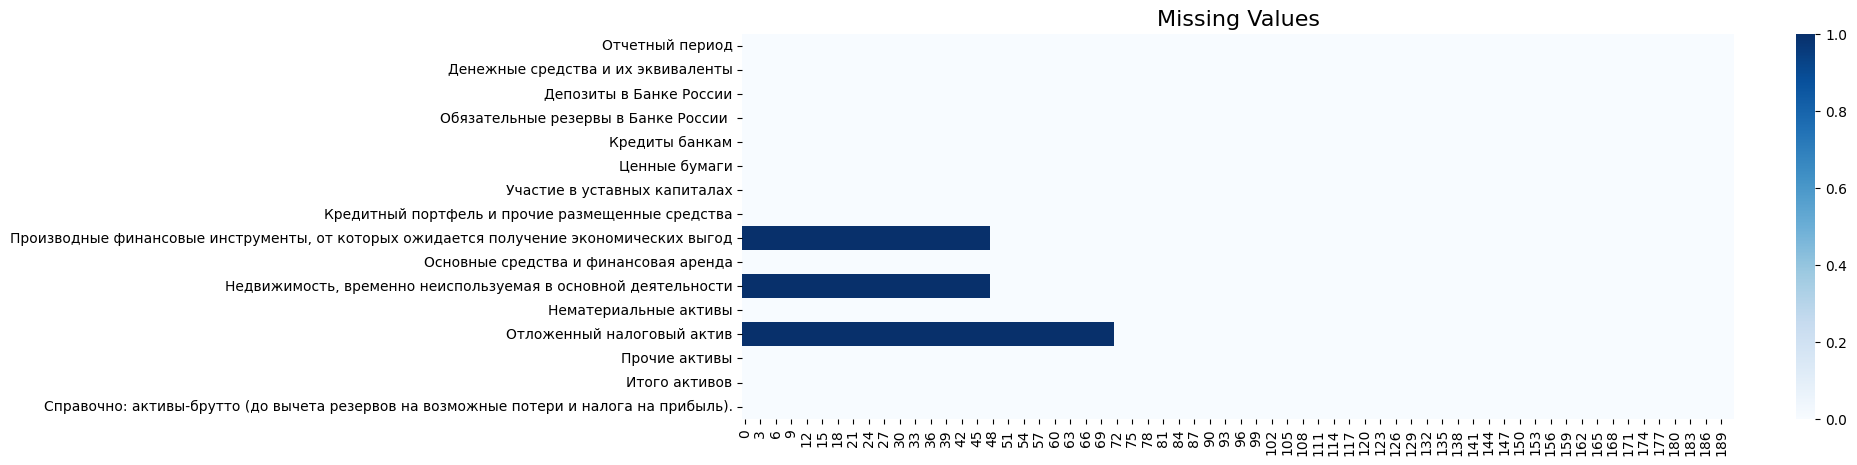

In [13]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

In [ ]:
# так как NaN в начале, то используем для их замены нули 

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.lineplot(x=df['Отчетный период'], y=df['Производные финансовые инструменты, от которых ожидается получение экономических выгод'].fillna(0), color='darkorange', label = 'modified')
sns.lineplot(x=df['Отчетный период'], y=df['Производные финансовые инструменты, от которых ожидается получение экономических выгод'].fillna(np.inf), color='dodgerblue', label = 'original')
ax.set_title('Fill NaN with 0', fontsize=14)
ax.set_ylabel(ylabel='', fontsize=14)

ax.set_xlim([date(2008, 1, 1), date(2024, 1, 1)])
    
plt.tight_layout()
plt.show()

In [ ]:
df['Производные финансовые инструменты, от которых ожидается получение экономических выгод'] = df['Производные финансовые инструменты, от которых ожидается получение экономических выгод'].fillna(0)
df['Недвижимость, временно неиспользуемая в основной деятельности'] = df['Недвижимость, временно неиспользуемая в основной деятельности'].fillna(0)
df['Отложенный налоговый актив'] = df['Отложенный налоговый актив'].fillna(0)


In [ ]:
df

C:\Users\Дарья\AppData\Local\Temp\ipykernel_13188\3736904528.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resampled_df = df[['Отчетный период','Денежные средства и их эквиваленты']].resample('Y', on='Отчетный период').sum().reset_index(drop=False)
C:\Users\Дарья\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)
C:\Users\Дарья\AppData\Local\Temp\ipykernel_13188\3736904528.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resampled_df = df[['Отчетный период','Денежные средства и их эквиваленты']].resample('4Y', on='Отчетный период').sum().reset_index(drop=False)
C:\Users\Дарь

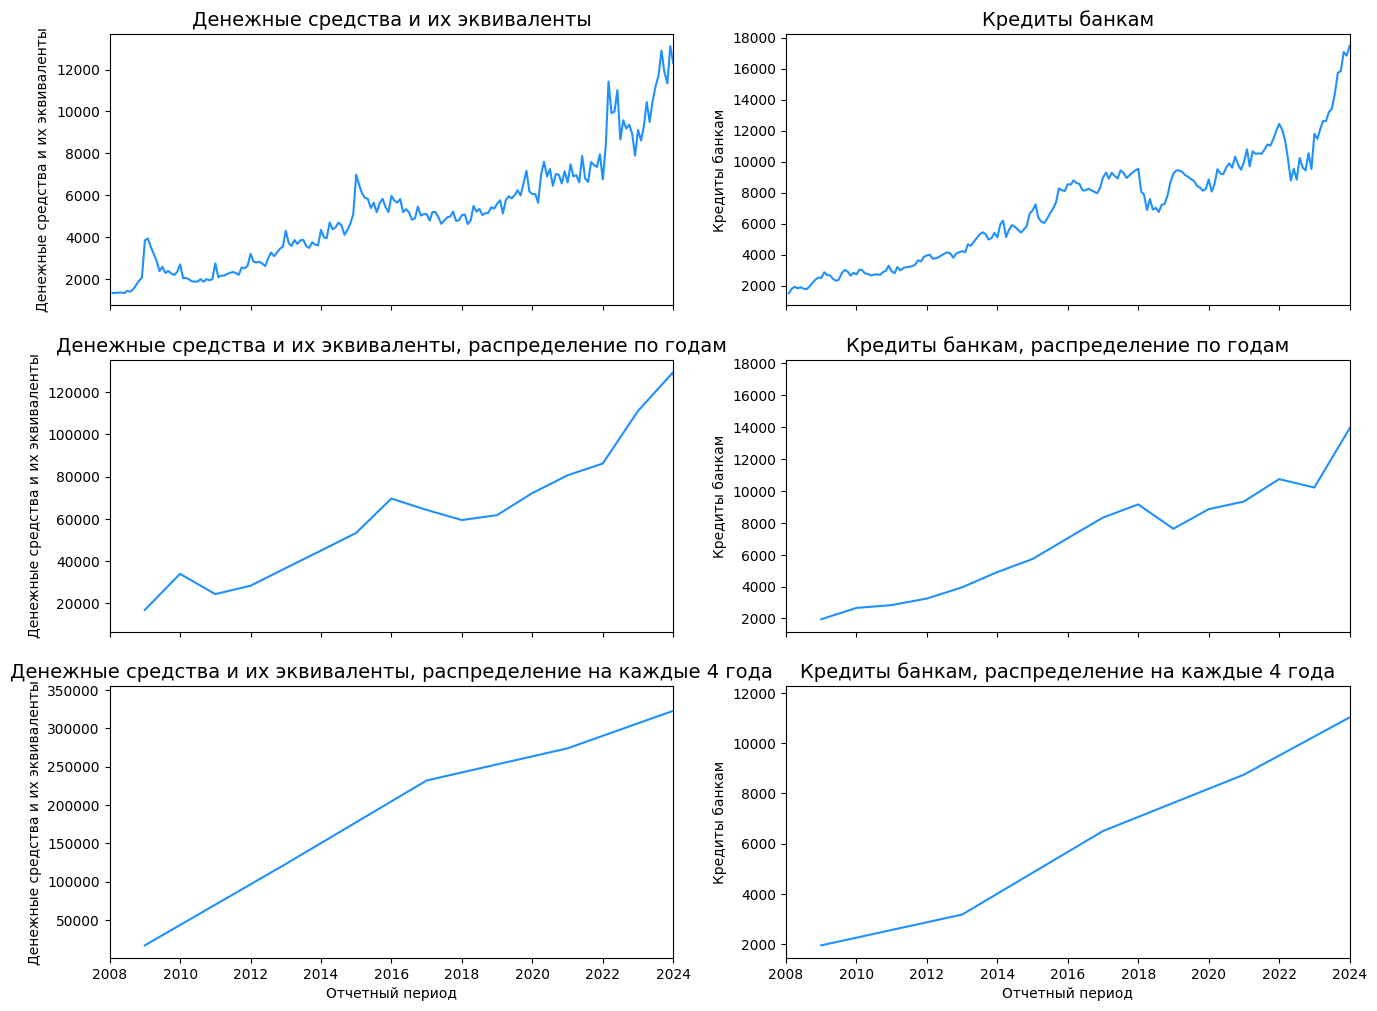

In [15]:
# сделаем понижающую выборку от месяцев до 1 года и до 4 лет (воз (возможно, получим некоторую дополнительную информацию)

fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(x='Отчетный период', y='Денежные средства и их эквиваленты', data=df, color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Денежные средства и их эквиваленты', fontsize=14)

resampled_df = df[['Отчетный период','Денежные средства и их эквиваленты']].resample('Y', on='Отчетный период').sum().reset_index(drop=False)
sns.lineplot(x='Отчетный период', y='Денежные средства и их эквиваленты', data=resampled_df, color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Денежные средства и их эквиваленты, распределение по годам', fontsize=14)

resampled_df = df[['Отчетный период','Денежные средства и их эквиваленты']].resample('4Y', on='Отчетный период').sum().reset_index(drop=False)
sns.lineplot(x='Отчетный период', y='Денежные средства и их эквиваленты', data=resampled_df, color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Денежные средства и их эквиваленты, распределение на каждые 4 года', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2008, 1, 1), date(2024, 1, 1)])

sns.lineplot(x = 'Отчетный период', y = 'Кредиты банкам', data = df, color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Кредиты банкам', fontsize=14)

resampled_df = df[['Отчетный период','Кредиты банкам']].resample('Y', on='Отчетный период').mean().reset_index(drop=False)
sns.lineplot(x = 'Отчетный период', y = 'Кредиты банкам', data = resampled_df, color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Кредиты банкам, распределение по годам', fontsize=14)

resampled_df = df[['Отчетный период','Кредиты банкам']].resample('4Y', on='Отчетный период').mean().reset_index(drop=False)
sns.lineplot(x = 'Отчетный период', y = 'Кредиты банкам', data = resampled_df, color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Кредиты банкам, распределение на каждые 4 года', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2008, 1, 1), date(2024, 1, 1)])
plt.show()